# Ejercicio 01

**1. ¿En qué se diferencian los algoritmos de optimización genéticos y los de enjambre de partículas?**

Los algoritmos genéticos (GA) y los de enjambre de partículas (PSO) son técnicas de optimización, pero se diferencian en su enfoque. GA se inspira en la evolución natural y usa operadores como selección, cruce y mutación en una población de soluciones discretas. PSO, basado en el comportamiento social de enjambres, mueve partículas en un espacio continuo ajustando sus velocidades según su experiencia y la del enjambre. Mientras GA evoluciona generaciones de soluciones, PSO coordina el movimiento cooperativo de partículas hacia la mejor solución.

**2. ¿En qué parte de los algoritmos de enjambre de partículas se considera la “exploración” y “explotación”?**

En los algoritmos de enjambre de partículas (PSO), la "exploración" se realiza mediante el componente aleatorio y la influencia del mejor global (global best), permitiendo a las partículas buscar nuevas áreas del espacio de búsqueda. La "explotación" se logra mediante el componente de la mejor posición personal (personal best) de cada partícula, haciendo que las partículas se concentren alrededor de las mejores soluciones encontradas. Esto equilibra la búsqueda de nuevas soluciones y la mejora de las existentes.

**3. ¿Se pueden paralelizar los algoritmos de enjambre de partículas?**

Sí, los algoritmos de enjambre de partículas (PSO) se pueden paralelizar. Esto, dado que la actualización de la posición y la velocidad de cada partícula es independiente de las demás. Es decir, estas operaciones se pueden realizar simultáneamente en múltiples procesadores o núcleos. 

# Ejercicio 2

Instrucciones:

Mediante el uso de algoritmos de enjambre de partículas, resuelva el siguiente ejercicio.
Implemente un algoritmo de optimización de enjambre de partículas (PSO) para encontrar el mínimo de la función

𝑓(𝑥, 𝑦) = (𝑥 − 3) ** 2 + (𝑦 − 2) ** 2

Para ello considere lo siguiente::
1. Inicialice el enjambre con N = 40 partículas
2. Cada posición de partículas estará dentro del rango [-10, 10] tanto para x como y.
3. La velocidad deberá estar en el rango [-1, 1]
4. Establezca la mejor posición personal inicial de cada partícula en su posición inicial y la mejor posición global en la mejor posición inicial de partícula.
5. Para cada partícula:

    a. Actualice su velocidad según lo visto en clase

    b. Actualice su posición según lo visto en clase

6. Use inicialmente w=0.5, c1 = 1.5, c2 = 1.5
7. r1 y r2 son valores aleatorios entre 0 y 1 (recuerde usar seed)
8. Actualice la mejor posición personal si la nueva posición tiene un valor de función más bajo que la mejor posición personal anterior,
9. Actualice la mejor posición global si la nueva posición tiene un valor de función más bajo que la mejor posición global anterior.
10. Repita este proceso a lo sumo 100 veces o hasta que el cambio en el global sea menor a un threshold definido por usted.
Recuerde graficar el contour plot de la función y mostrar la evolución de las partículas sobre este. Es decir, deberá mostrar al menos 3 gráficas del inicio, algún punto medio y el final de su iteración para encontrar la solución. Nota, la solución para esta función está en (3,2).

Iteracion número 0
Mejor posición global: [2.84272401 2.0943443 ], Mejor score: 0.033636583535520646
Iteracion número 1
Mejor posición global: [2.42175575 3.73999151], Mejor score: 0.033636583535520646
Iteracion número 2
Mejor posición global: [2.80498225 2.2418842 ], Mejor score: 0.033636583535520646
Iteracion número 3
Mejor posición global: [3.11014007 1.92503034], Mejor score: 0.017751285334142195
Iteracion número 4
Mejor posición global: [2.9382154  2.07517742], Mejor score: 0.009468981291537
Iteracion número 5
Mejor posición global: [2.87041607 2.4638318 ], Mejor score: 0.009468981291537
Iteracion número 6
Mejor posición global: [3.01897922 2.05651055], Mejor score: 0.0035536529667885043
Iteracion número 7
Mejor posición global: [3.01653529 2.13512293], Mejor score: 0.0035536529667885043
Iteracion número 8
Mejor posición global: [3.01666466 2.01310066], Mejor score: 0.00044933810237850376
Iteracion número 9
Mejor posición global: [3.16297986 1.46417733], Mejor score: 0.00044933810

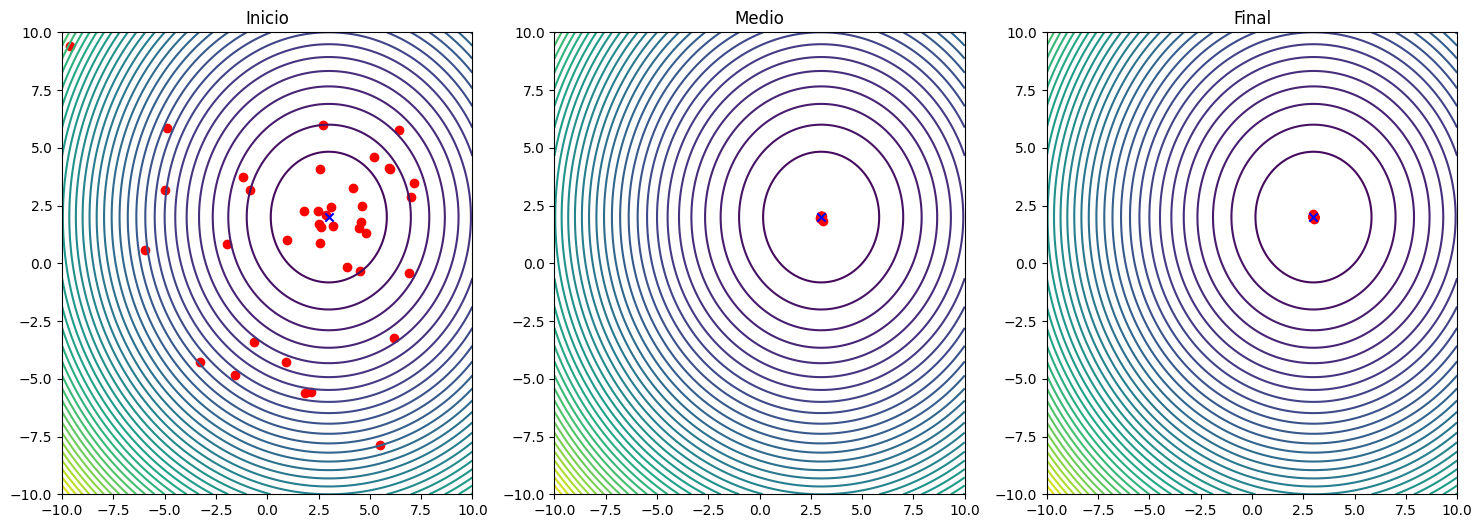

La mejor posición encontrada es [2.99902073 1.9990244 ] con un score de 1.9107541501682693e-06


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función a minimizar
def objective_function(x, y):
    return (x - 3) ** 2 + (y - 2) ** 2

# Parámetros del PSO
num_particles = 40
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5
threshold = 1e-5

# Inicializar posiciones y velocidades de las partículas
np.random.seed(42)
positions = np.random.uniform(-10, 10, (num_particles, 2))
velocities = np.random.uniform(-1, 1, (num_particles, 2))
personal_best_positions = np.copy(positions)
personal_best_scores = objective_function(personal_best_positions[:, 0], personal_best_positions[:, 1])
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

# Función para actualizar velocidad y posición
def update_velocity(velocity, position, personal_best, global_best):
    r1, r2 = np.random.rand(), np.random.rand()
    cognitive_component = c1 * r1 * (personal_best - position)
    social_component = c2 * r2 * (global_best - position)
    new_velocity = w * velocity + cognitive_component + social_component
    return new_velocity

def update_position(position, velocity):
    new_position = position + velocity
    return new_position

# Variables para graficar
contour_interval = num_iterations // 3
positions_history = []

# PSO loop
for i in range(num_iterations):
    print(f"Iteracion número {i}")
    for j in range(num_particles):
        velocities[j] = update_velocity(velocities[j], positions[j], personal_best_positions[j], global_best_position)
        positions[j] = update_position(positions[j], velocities[j])
        score = objective_function(positions[j][0], positions[j][1])
        
        if score < personal_best_scores[j]:
            personal_best_positions[j] = positions[j]
            personal_best_scores[j] = score
        
        if score < global_best_score:
            global_best_position = positions[j]
            global_best_score = score
    
    # Guardar posiciones para graficar
    if i % contour_interval == 0 or i == num_iterations - 1:
        positions_history.append(np.copy(positions))

    print(f"Mejor posición global: {global_best_position}, Mejor score: {global_best_score}")
    
    # Condición de término
    if global_best_score < threshold:
        break

# Graficar los resultados
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

# Asegurarse de que hay 3 puntos para graficar
if len(positions_history) < 3:
    additional_points_needed = 3 - len(positions_history)
    for _ in range(additional_points_needed):
        positions_history.append(np.copy(positions))

# Graficar
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, pos, title in zip(axs, positions_history, ['Inicio', 'Medio', 'Final']):
    ax.contour(X, Y, Z, levels=50, cmap='viridis')
    ax.scatter(pos[:, 0], pos[:, 1], color='red')
    ax.scatter(global_best_position[0], global_best_position[1], color='blue', marker='x')
    ax.set_title(title)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

plt.show()

print(f"La mejor posición encontrada es {global_best_position} con un score de {global_best_score}")


# Ejercicio 3

Usando el ejercicio anterior, pruebe cambiar los valores de w, c1, y c2 con nuevos valores que ustedes definan.
Deben probar al menos 3 sets diferentes a los datos y sobre estos evaluar
- ¿Cambió el resultado?
- ¿Cuántas iteraciones tomó?

Recuerde graficar el contour plot de la función.

Set 1 (w=0.3, c1=1.5, c2=1.5) - Mejor posición encontrada: [3.00277473 2.00150361], Mejor score: 9.959970409215868e-06, Iteraciones: 14


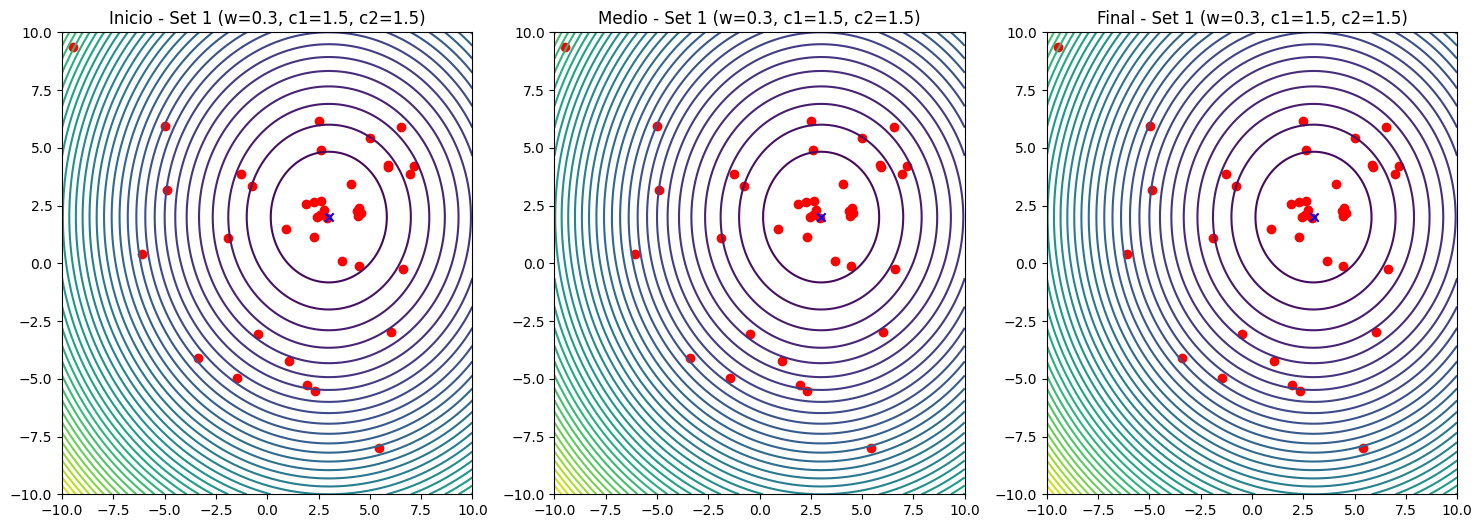

Set 2 (w=0.5, c1=2.0, c2=2.0) - Mejor posición encontrada: [2.99956535 2.00154973], Mejor score: 2.590567548206553e-06, Iteraciones: 46


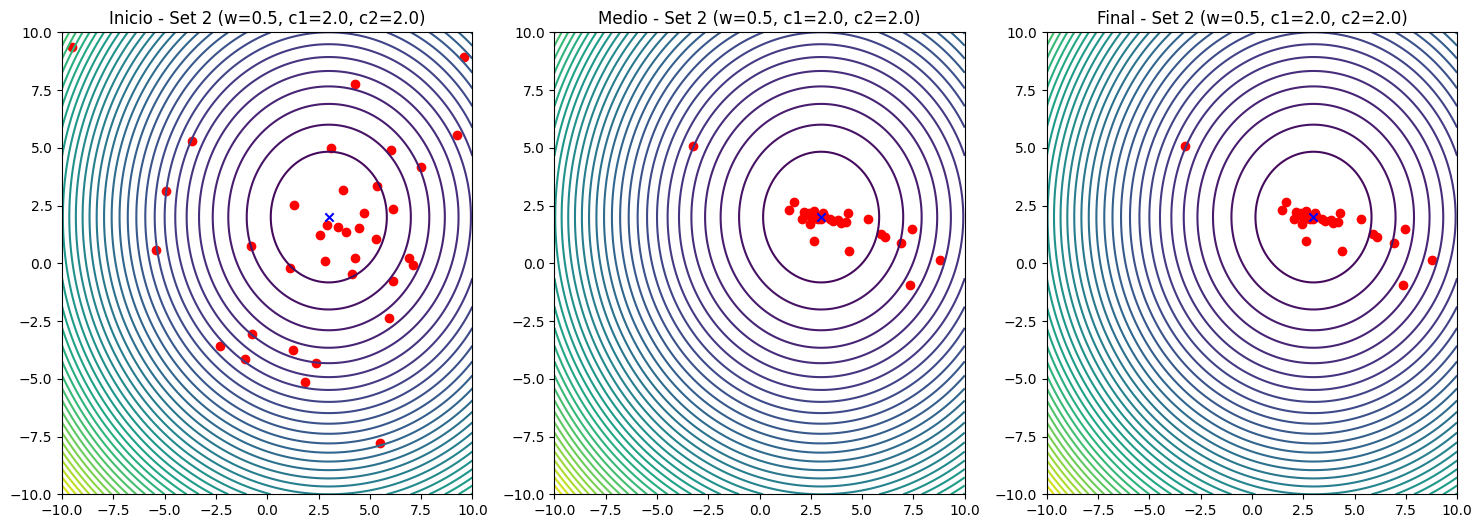

Set 3 (w=0.9, c1=1.0, c2=2.0) - Mejor posición encontrada: [169.04295873 -38.56984569], Mejor score: 0.3198053616469951, Iteraciones: 100


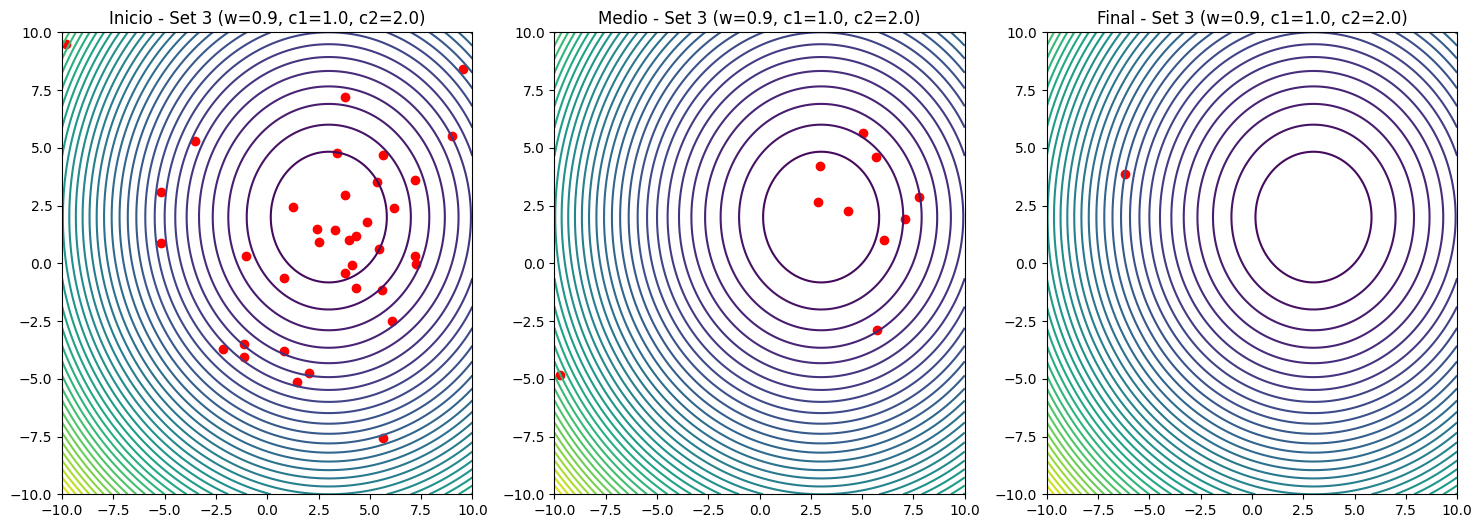

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función a minimizar
def objective_function(x, y):
    return (x - 3) ** 2 + (y - 2) ** 2

# Función para actualizar velocidad y posición
def update_velocity(velocity, position, personal_best, global_best, w, c1, c2):
    r1, r2 = np.random.rand(), np.random.rand()
    cognitive_component = c1 * r1 * (personal_best - position)
    social_component = c2 * r2 * (global_best - position)
    new_velocity = w * velocity + cognitive_component + social_component
    return new_velocity

def update_position(position, velocity):
    new_position = position + velocity
    return new_position

# Función para ejecutar el PSO con un set de parámetros específicos
def run_pso(w, c1, c2):
    num_particles = 40
    num_iterations = 100
    threshold = 1e-5

    # Inicializar posiciones y velocidades de las partículas
    np.random.seed(42)
    positions = np.random.uniform(-10, 10, (num_particles, 2))
    velocities = np.random.uniform(-1, 1, (num_particles, 2))
    personal_best_positions = np.copy(positions)
    personal_best_scores = objective_function(personal_best_positions[:, 0], personal_best_positions[:, 1])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = np.min(personal_best_scores)

    # Variables para graficar
    contour_interval = num_iterations // 3
    positions_history = []

    # PSO loop
    for i in range(num_iterations):
        for j in range(num_particles):
            velocities[j] = update_velocity(velocities[j], positions[j], personal_best_positions[j], global_best_position, w, c1, c2)
            positions[j] = update_position(positions[j], velocities[j])
            score = objective_function(positions[j][0], positions[j][1])

            if score < personal_best_scores[j]:
                personal_best_positions[j] = positions[j]
                personal_best_scores[j] = score

            if score < global_best_score:
                global_best_position = positions[j]
                global_best_score = score

        # Guardar posiciones para graficar
        if i % contour_interval == 0 or i == num_iterations - 1:
            positions_history.append(np.copy(positions))

        # Condición de término
        if global_best_score < threshold:
            break

    return positions_history, global_best_position, global_best_score, i + 1

# Graficar los resultados
def plot_results(positions_history, global_best_position, set_description):
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(X, Y)

    # Asegurarse de que hay 3 puntos para graficar
    if len(positions_history) < 3:
        additional_points_needed = 3 - len(positions_history)
        for _ in range(additional_points_needed):
            positions_history.append(np.copy(positions_history[-1]))

    # Graficar
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    titles = ['Inicio', 'Medio', 'Final']

    for ax, pos, title in zip(axs, positions_history, titles):
        ax.contour(X, Y, Z, levels=50, cmap='viridis')
        ax.scatter(pos[:, 0], pos[:, 1], color='red')
        ax.scatter(global_best_position[0], global_best_position[1], color='blue', marker='x')
        ax.set_title(f'{title} - {set_description}')
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])

    plt.show()

# Probar con diferentes sets de parámetros
sets = [
    (0.3, 1.5, 1.5),
    (0.5, 2.0, 2.0),
    (0.9, 1.0, 2.0)
]

for i, (w, c1, c2) in enumerate(sets):
    positions_history, global_best_position, global_best_score, iterations = run_pso(w, c1, c2)
    set_description = f'Set {i+1} (w={w}, c1={c1}, c2={c2})'
    print(f"{set_description} - Mejor posición encontrada: {global_best_position}, Mejor score: {global_best_score}, Iteraciones: {iterations}")
    plot_results(positions_history, global_best_position, set_description)


Los resultados cambiaron con respecto la ejecución con los valores
w = 0.5
c1 = 1.5
c2 = 1.5

En ninguna de las 3 iteraciones con valores diferentes convergió tan exactamente con la primera ejecución, al punto que la ultima ejecución no convergió en ningun momento. Las primeras 2 ejecuciones convergieron en la ejecucion 14 y 46 respectivamente,

Link GitHub: https://github.com/jazurdia/Lab-01---MS